# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 21.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
xarray 2025.7.1 requires pandas>=2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [9]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Write your code here to read the data
path = "/content/drive/MyDrive/COURSE/FoodHub-Project/foodhub_order.csv"
data = pd.read_csv(path)

In [17]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [18]:
# Write your code here
data.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [19]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [20]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [79]:
# Write your code here
data.describe()

min_prep = data["food_preparation_time"].min()
avg_prep = data["food_preparation_time"].mean()
max_prep = data["food_preparation_time"].max()

print(f"Minimum preparation time: {min_prep} minutes")
print(f"Average preparation time: {avg_prep:.2f} minutes")
print(f"Maximum preparation time: {max_prep} minutes")

Minimum preparation time: 20 minutes
Average preparation time: 27.37 minutes
Maximum preparation time: 35 minutes


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [33]:
# Write the code here
print(data['rating'].value_counts())
print('736 orders are not rated.')

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
736 orders are not rated.


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

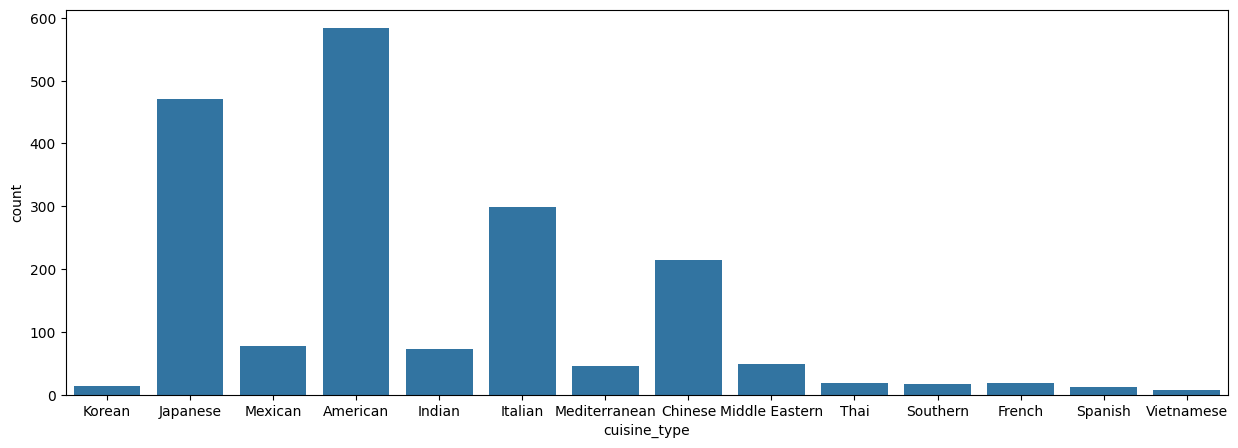

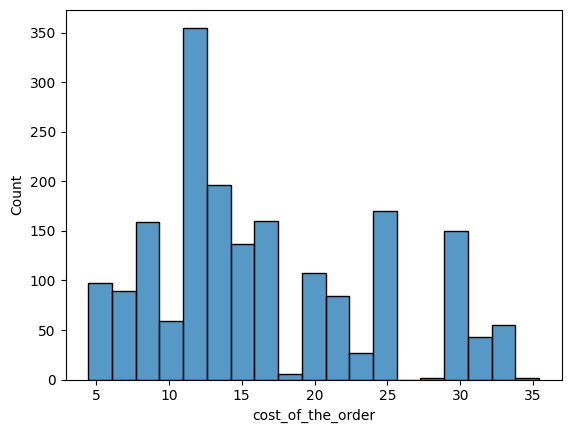

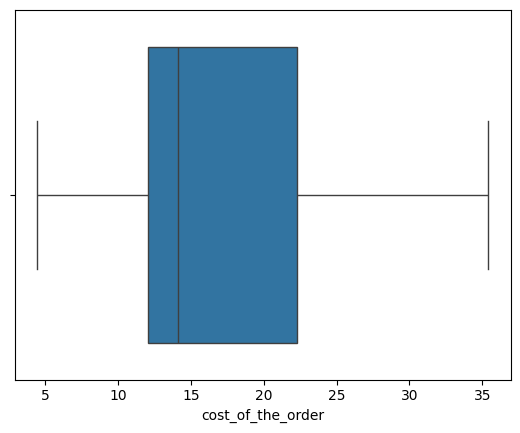

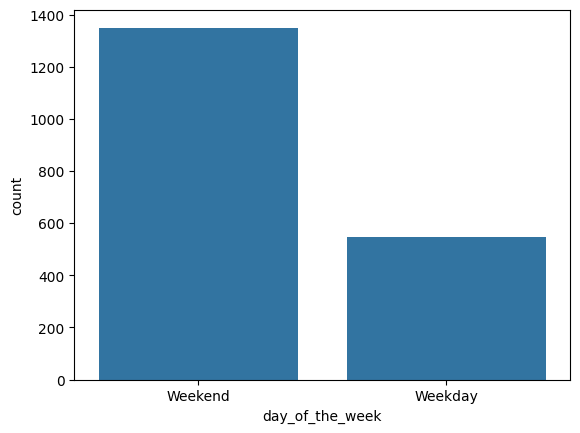

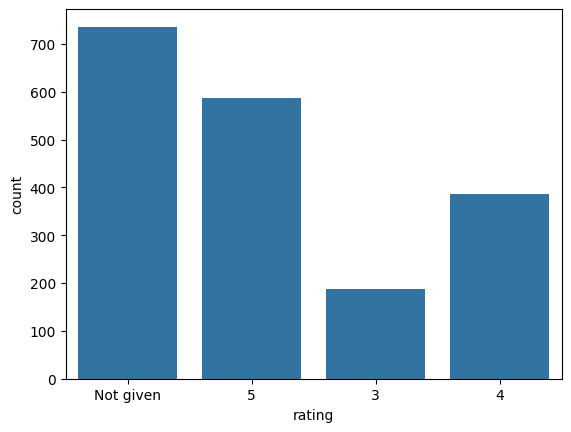

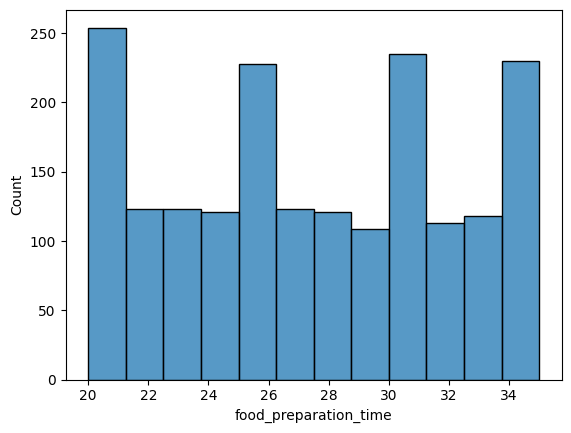

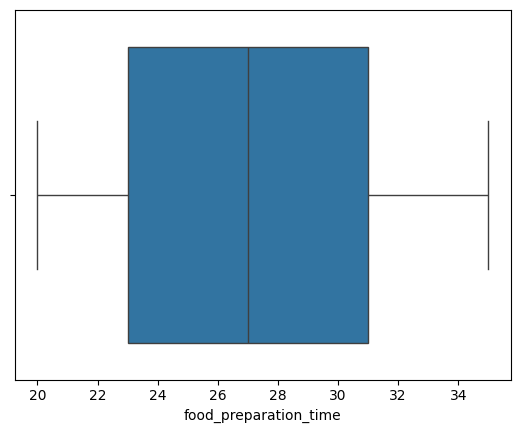

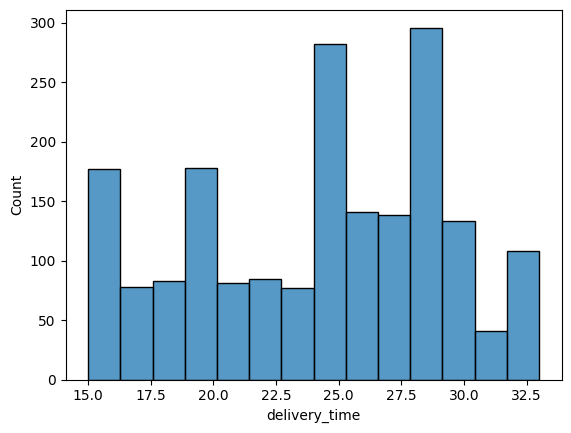

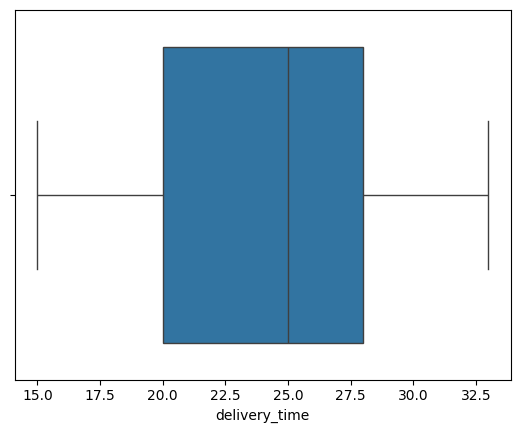

In [36]:
# Write the code here

# unique order ID
data['order_id'].nunique()

# unique customer ID
data['customer_id'].nunique()

# unique Restaurant Name
data['restaurant_name'].nunique()

# unique cuisine type
data['cuisine_type'].nunique()

plt.figure(figsize = (15,5))
sns.countplot(data = data, x = 'cuisine_type')
plt.show()

# Cost of the order
sns.histplot(data=data, x='cost_of_the_order')
plt.show()
sns.boxplot(data=data, x='cost_of_the_order')
plt.show()

# Day of the week
data['day_of_the_week'].unique()
sns.countplot(data = data, x = 'day_of_the_week')
plt.show()

# Rating
data['rating'].unique()
sns.countplot(data = data, x = 'rating')
plt.show()

# Food Preparation time
sns.histplot(data=data, x='food_preparation_time')
plt.show()
sns.boxplot(data=data, x='food_preparation_time')
plt.show()

# Delivery time
sns.histplot(data=data, x='delivery_time')
plt.show()
sns.boxplot(data=data, x='delivery_time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [40]:
# Write the code here
data['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [41]:
# Write the code here
data_weekend = data[data['day_of_the_week'] == 'Weekend']
data_weekend['cuisine_type'].value_counts().head(1)

,count
cuisine_type,
American,415


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [54]:
# Write the code here
data_greater_than_20 = data[data['cost_of_the_order'] > 20]
percentage = (data_greater_than_20.shape[0] / data.shape[0]) * 100
print(percentage)

29.24130663856691


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [55]:
# Write the code here
delivery = data['delivery_time'].mean()
print(delivery)

24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [56]:
# Write the code here
data['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


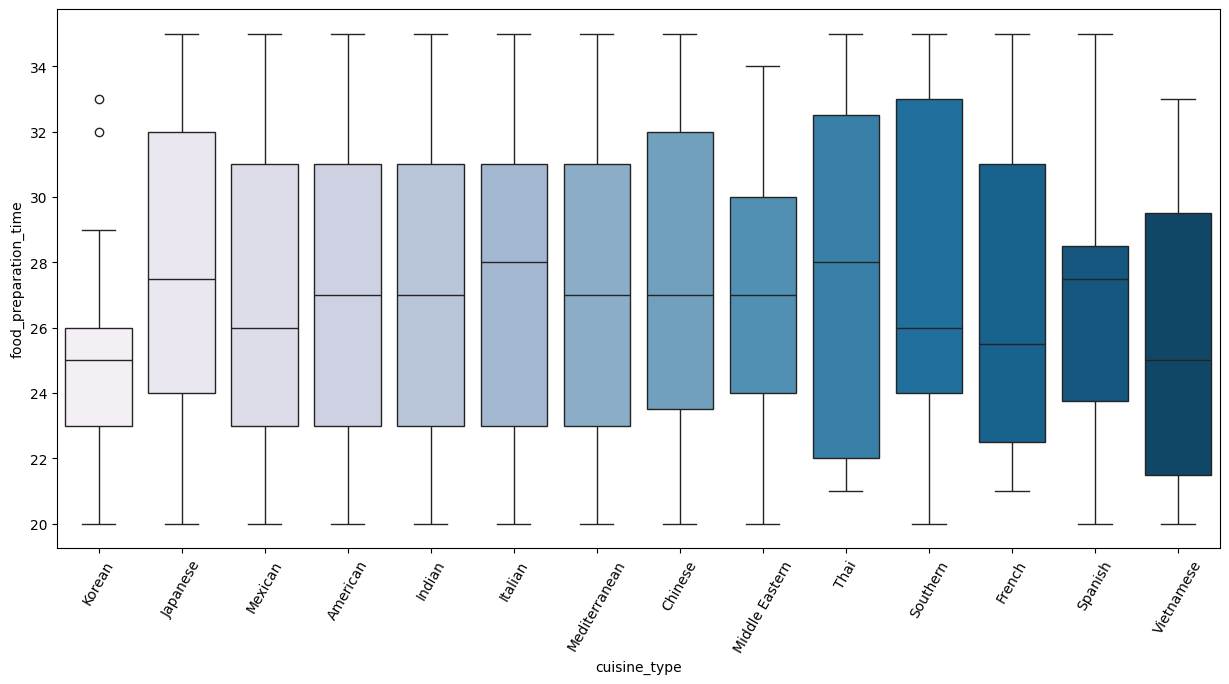

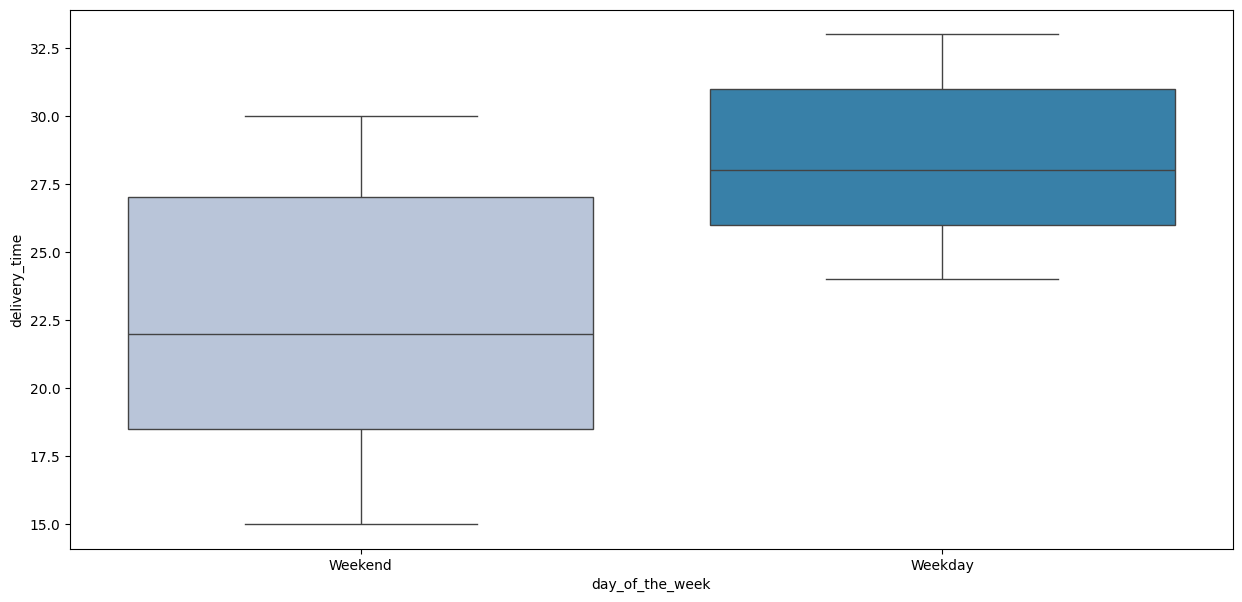

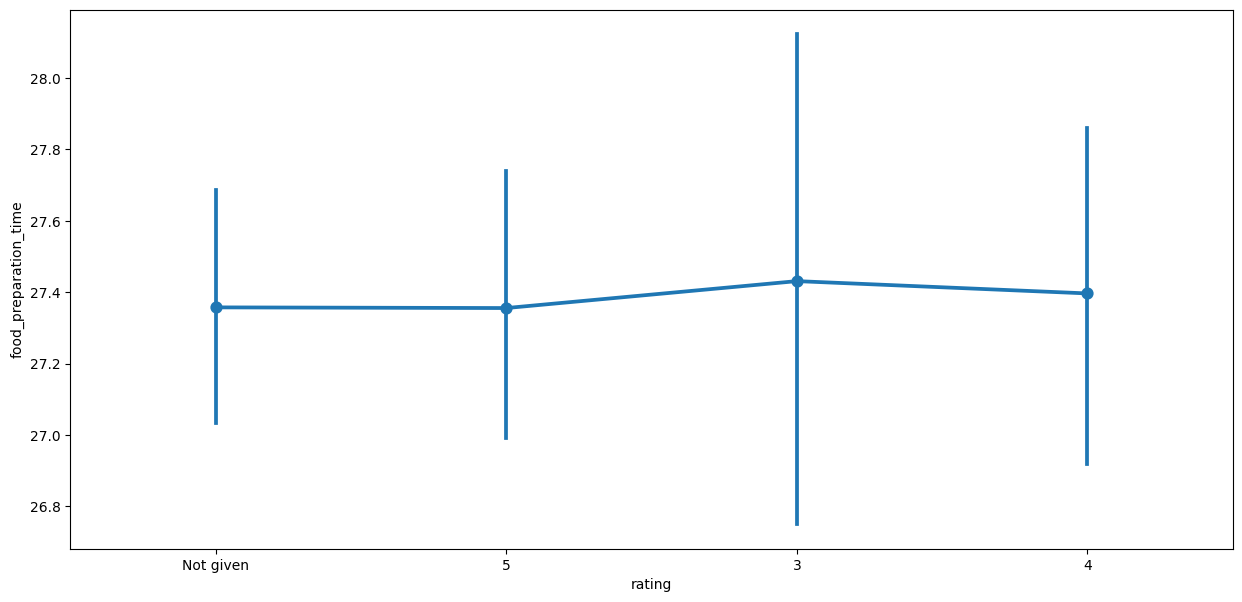

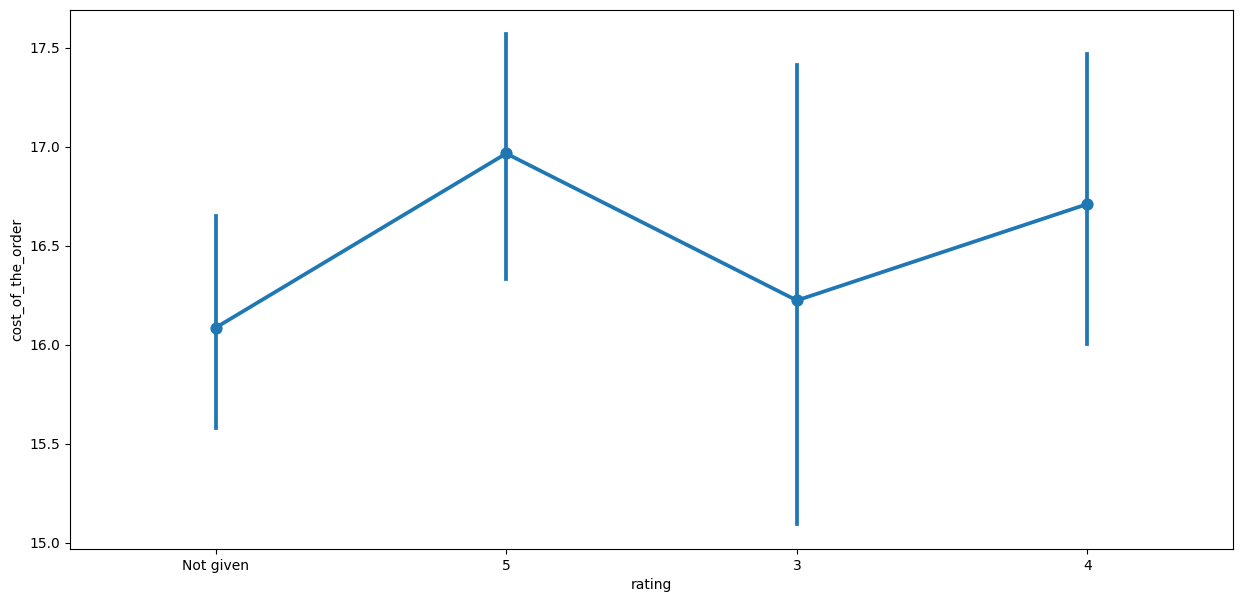

In [59]:
# Write the code here
# Cuisine vs Food Preparation time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = data, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

# Day of the Week vs Delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = data, palette = 'PuBu', hue = "day_of_the_week")
plt.show()

# Rating vs Food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = data)
plt.show()

# Rating vs Cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = data)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [80]:
# Write the code here
# filter rated restaurants
df_rated = data[data['rating'] != 'Not given'].copy()

# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# create dataframe that contains restaurant names with corresponding rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

# get restaurant names that have rating count greater than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']  ## restaurants with rating count > 50

# filter to get data of restaurants that have rating greater than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# group restaurant names with their ratings then find mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()  ## mean rating per restaurant

# filter average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## keep avg rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [70]:
# Write the code here
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

data['Revenue'] = data['cost_of_the_order'].apply(compute_rev)
data.head()
total_rev = data['Revenue'].sum()
print(total_rev)

6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [69]:
# Write the code here
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
orders_over_60 = data[data['total_time'] > 60].shape[0]
percentage_over_60 = (orders_over_60 / data.shape[0]) * 100
print(percentage_over_60)

10.537407797681771


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [76]:
# Write the code here
print((data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()))
print((data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()))
print('The delivery time of orders on weekends is longer than that on weekdays')

28.340036563071298
22.4700222057735
The delivery time of orders on weekends is longer than that on weekdays


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  American cuisine is the most popular on weekends
*  Ratings are generally high (mostly 4–5) but some delays occur during peak times
*  736 orders have “Not given” ratings, showing a large portion of transactions without feedback
*  Orders over $20 form a significant share of revenue
*  About 11% of orders take more than 60 minutes from order to delivery




### Recommendations:
*  Highlight top-rated, high-volume restaurants and cuisines on the app to drive sales
*  Add delivery capacity on weekends to cut peak-time delays
*  Work with slower restaurants to reduce prep times
*  Motivate customers to leave ratings for more complete feedback
*  Offer discounts or deals on slower-moving cuisines to expand customer choices

---